##(1) Implement the generalized equation for finding the gradient of m-samples, each having n-features. Also, implement the gradient descent approach assuming a constant learning rate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def h(X, w):
    val = np.dot(X, w)
    return val

def gradientJ(X, y, w):
    m = len(y)
    h_x = h(X, w)
    grad = np.dot(X.T, (h_x - y)) / m
    return grad

def grad_descent_alpha(start_point, X, y):
    iteration = 0
    w = start_point
    grad = gradientJ(X, y, w)
    eps = 10e-5
    iterates = []
    iterates.append(list(w))

    while np.linalg.norm(grad) > eps and iteration < 1000:
        direction = -grad
        alpha = 0.01
        w = w - alpha * grad
        iterates.append(list(w))
        iteration += 1
        grad = gradientJ(X, y, w)

    iterates = np.array(iterates)
    return w, iterates

##(2) Using the code developed for problem 1, do the linear regression for the univariate problem using the attached data file univariate_linear_regression.csv. Plot the cost function (both as surface as well as contour) as well as the best fit line.

Weight vector is:  [[-10.06465193]
 [  2.97261411]]


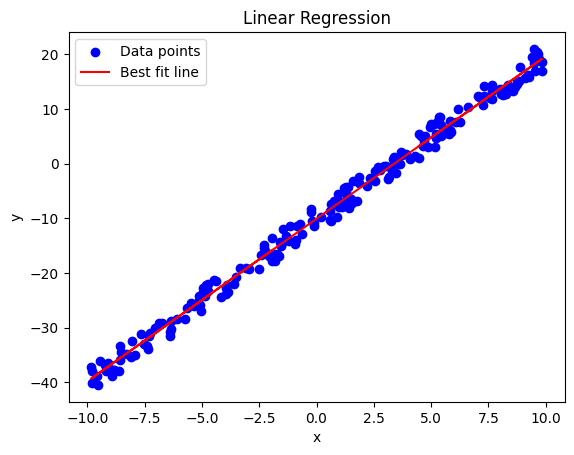

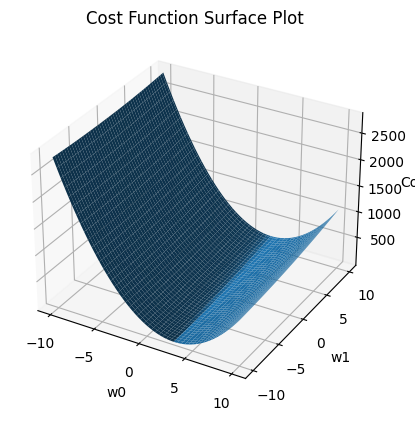

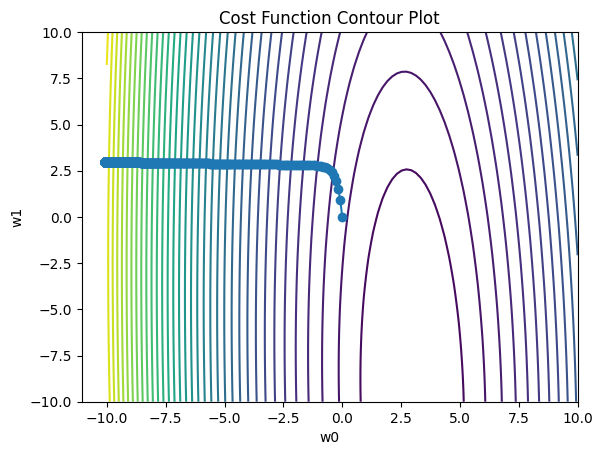

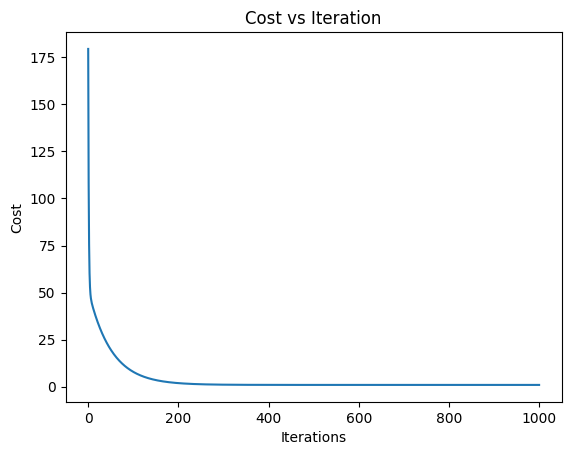

In [12]:
data = pd.read_csv('univariate_linear_regression.csv')

X1 = data['x'].values.reshape(-1, 1)  # Feature matrix
X = np.concatenate((np.ones((len(X1), 1)), X1), axis=1)
y = data['y'].values.reshape(-1, 1)  # Target vector

# Initialize weight vector w
w_initial = np.zeros((X.shape[1], 1))

# Perform gradient descent to optimize w
optimal_w, iterates = grad_descent_alpha(w_initial, X, y)

print("Weight vector is: ", optimal_w)

# Plotting the data and the best-fit line
plt.scatter(X[:, 1], y, color='blue', label='Data points')
plt.plot(X[:, 1], h(X, optimal_w), color='red', label='Best fit line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

def cost_function(X, y, w):
    m = len(y)
    h_x = h(X, w)
    cost = np.sum((h_x - y) ** 2) / (2 * m)
    return cost

w0_vals = np.linspace(-10, 10, 100)
w1_vals = np.linspace(-10, 10, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
J_vals = np.zeros_like(W0)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = np.array([[w0_vals[i]], [w1_vals[j]]])
        J_vals[i, j] = cost_function(X, y, w)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, J_vals)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface Plot')
plt.show()

plt.contour(W0, W1, J_vals, levels= 40)
plt.plot(iterates[:,0], iterates[:,1],'o-')
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Cost Function Contour Plot')
plt.show()

# Perform gradient descent to optimize w
optimal_w, iterates = grad_descent_alpha(w_initial, X, y)

# Calculate costs for each iterate
costs = [cost_function(X, y, w) for w in iterates]

# Plot cost vs iteration graph
plt.plot(range(len(costs)), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

##(3) Using the code developed for problem 1, do the linear regression for the multivariate problem using the attached data file heart.data.csv. Plot the best fit plane for the given data. Can you also interpret the result (taking one independent variable at a time)?

Optimal weight vector:
[[10.17409882]
 [-4.29464595]
 [ 1.47680287]]


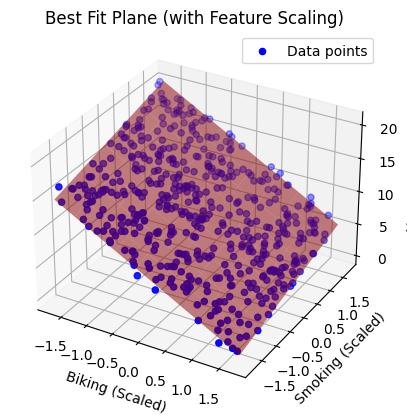

In [17]:
data = pd.read_csv('heart.data.csv')

# Extract features and labels
X1 = data['biking'].values.reshape(-1, 1)  # First feature
X2 = data['smoking'].values.reshape(-1, 1)  # Second feature
X = np.concatenate((X1, X2), axis=1)  # Feature matrix
y = data['heart.disease'].values.reshape(-1, 1)  # Target vector

# Feature scaling using manual implementation
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias term to scaled features
X_scaled = np.concatenate((np.ones((len(X_scaled), 1)), X_scaled), axis=1)

# Initialize weight vector w
w_initial = np.zeros((X_scaled.shape[1], 1))

# Perform gradient descent to optimize w
optimal_w, iterates = grad_descent_alpha(w_initial, X_scaled, y)

print("Optimal weight vector:")
print(optimal_w)

# Plotting the best-fit plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 1], X_scaled[:, 2], y, color='blue', label='Data points')
x1_range = np.linspace(min(X_scaled[:, 1]), max(X_scaled[:, 1]), 10)
x2_range = np.linspace(min(X_scaled[:, 2]), max(X_scaled[:, 2]), 10)
x1_range, x2_range = np.meshgrid(x1_range, x2_range)
y_pred = optimal_w[0] + optimal_w[1] * x1_range + optimal_w[2] * x2_range
ax.plot_surface(x1_range, x2_range, y_pred, color='red', alpha=0.5)
ax.set_xlabel('Biking (Scaled)')
ax.set_ylabel('Smoking (Scaled)')
ax.set_zlabel('Heart Disease')
plt.title('Best Fit Plane (with Feature Scaling)')
plt.legend()
plt.show()

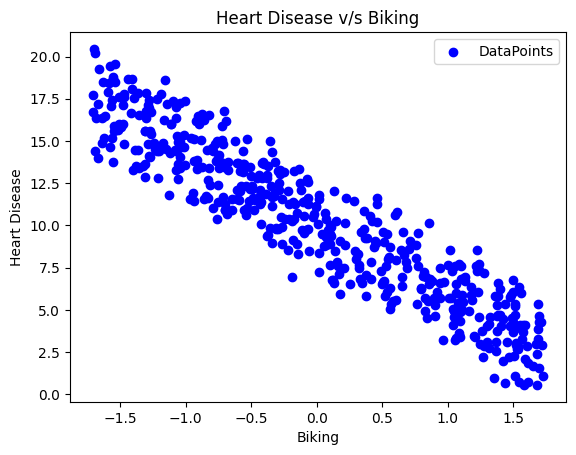

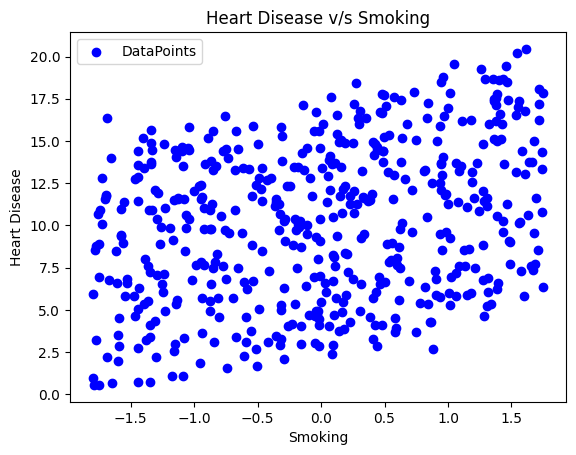

In [21]:
# Plotting only the actual values for Biking (Independent Variable 1)
plt.scatter(X_scaled[:, 1], y, color='blue', label='DataPoints')
plt.xlabel('Biking')
plt.ylabel('Heart Disease')
plt.title('Heart Disease v/s Biking')
plt.legend()
plt.show()

# Plotting only the actual values for Smoking (Independent Variable 2)
plt.scatter(X_scaled[:, 2], y, color='blue', label='DataPoints')
plt.xlabel('Smoking')
plt.ylabel('Heart Disease')
plt.title('Heart Disease v/s Smoking')
plt.legend()
plt.show()